In [111]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
#Task I/1
shot = pd.read_csv(r'C:\Users\Dominik\Documents\PPKE ITK\1.semester\Data analytics in sport\W3.1\W3\W3_data\NBA Shotlog_16_17.csv')
pd.set_option('display.max_columns', 100)
shot

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome
0,NaN,SF,Yes,97.0,SCORED,ATL,Pullup Jump Shot,2,WAS,405.0,1:09,10/27/2016,Kent Bazemore,NaN,1,MISSED
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED
2,SCORED,SG,Yes,239.0,MISSED,ATL,Jump Shot,2,WAS,223.0,1:41,10/27/2016,Kyle Korver,30.0,1,SCORED
3,SCORED,PG,Yes,102.0,SCORED,ATL,Pullup Jump Shot,2,WAS,385.0,2:16,10/27/2016,Dennis Schroder,35.0,1,SCORED
4,SCORED,PF,Yes,128.0,MISSED,ATL,Turnaround Jump Shot,2,WAS,265.0,2:40,10/27/2016,Paul Millsap,24.0,1,MISSED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210067,SCORED,F,No,58.0,MISSED,MIA,Jump Shot,2,WAS,153.0,8:18,4/12/2017,Daniel Ochefu,39.0,4,SCORED
210068,SCORED,F,No,52.0,SCORED,MIA,Dunk,2,WAS,250.0,8:51,4/12/2017,Daniel Ochefu,33.0,4,SCORED
210069,SCORED,F,No,171.0,SCORED,MIA,Jump Shot,2,WAS,149.0,9:20,4/12/2017,Daniel Ochefu,29.0,4,MISSED
210070,MISSED,PF,No,285.0,SCORED,MIA,Jump Shot,3,WAS,334.0,10:33,4/12/2017,Chris McCullough,73.0,4,MISSED


,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


Text(0.5, 1.0, 'Shots')

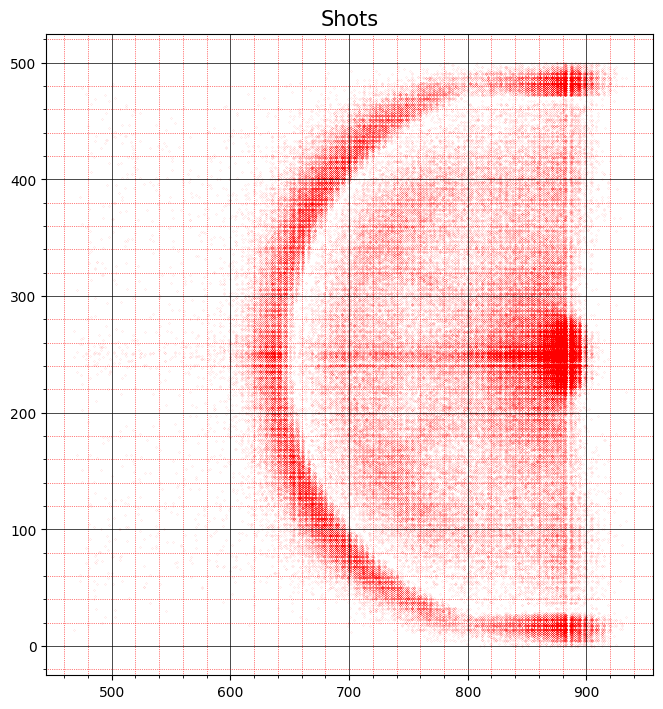

In [113]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
display(shot.describe())


hx = shot['halfcourt_x']
hy = shot['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hx,hy, s=.01,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Shots", fontsize = 15)

In [114]:
#We now breakdown shots into three categories: scored, missed and blocked.
#To do this we simply create subsets of the shot df based on shot outcome

Scored = shot[shot.current_shot_outcome == 'SCORED']
hxs = Scored['halfcourt_x']
hys = Scored['halfcourt_y']

Missed = shot[shot.current_shot_outcome == 'MISSED']
hxm = Missed['halfcourt_x']
hym = Missed['halfcourt_y']

Blocked = shot[shot.current_shot_outcome == 'BLOCKED']
hxb = Blocked['halfcourt_x']
hyb = Blocked['halfcourt_y']

In [115]:
# Task I/3
# Comparing players
# We use a pivot table here to list players by shots

playersn = shot.groupby('shoot_player')['current_shot_outcome'].describe().reset_index()
display(playersn.sort_values(by = 'count', ascending = False))

#Creating subsets

# Player subsets:

Durant = shot[shot['shoot_player']=='Kevin Durant']
display(Durant)

Howard = shot[shot['shoot_player'] == 'Dwight Howard']
Jordan = shot[shot['shoot_player'] == 'DeAndre Jordan']
Westbrook = shot[shot['shoot_player'] == 'Russell Westbrook']
display(Westbrook)
display(Howard)
display(Jordan)


,shoot_player,count,unique,top,freq
402,Russell Westbrook,1940,3,MISSED,1026
25,Andrew Wiggins,1568,3,MISSED,760
106,DeMar DeRozan,1545,3,MISSED,731
193,James Harden,1532,3,MISSED,772
28,Anthony Davis,1525,3,SCORED,770
...,...,...,...,...,...
111,Demetrius Jackson,4,2,SCORED,3
203,Jarrett Jack,3,2,SCORED,2
38,Ben Bentil,3,1,MISSED,3
202,Jarnell Stokes,1,1,SCORED,1


,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
63211,MISSED,SF,Yes,197.0,SCORED,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,10/25/2016,Kevin Durant,26.0,1,SCORED,736.0,256.0
63217,MISSED,SF,Yes,98.0,MISSED,GSW,Step Back Jump Shot,2,SAS,87.0,5:01,10/25/2016,Kevin Durant,27.0,1,SCORED,835.0,413.0
63218,SCORED,SF,Yes,92.0,MISSED,GSW,Turnaround Fadeaway,2,SAS,413.0,5:34,10/25/2016,Kevin Durant,33.0,1,SCORED,841.0,87.0
63219,SCORED,SF,Yes,244.0,MISSED,GSW,Pullup Jump Shot,3,SAS,423.0,5:59,10/25/2016,Kevin Durant,25.0,1,SCORED,689.0,77.0
63227,SCORED,SF,Yes,103.0,SCORED,GSW,Pullup Jump Shot,2,SAS,125.0,11:07,10/25/2016,Kevin Durant,35.0,1,MISSED,830.0,375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70306,SCORED,SF,Yes,148.0,SCORED,GSW,Turnaround Jump Shot,2,LAL,295.0,11:17,4/12/2017,Kevin Durant,22.0,2,SCORED,785.0,205.0
70312,MISSED,SF,Yes,890.0,MISSED,GSW,Jump Shot,3,LAL,15.0,2:53,4/12/2017,Kevin Durant,28.0,3,MISSED,890.0,15.0
70314,SCORED,SF,Yes,666.0,SCORED,GSW,Jump Shot,3,LAL,395.0,4:18,4/12/2017,Kevin Durant,32.0,3,SCORED,666.0,395.0
70323,MISSED,SF,Yes,878.0,MISSED,GSW,Layup,2,LAL,238.0,9:59,4/12/2017,Kevin Durant,50.0,3,MISSED,878.0,238.0


,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
140311,NaN,PG,No,853.0,NaN,PHI,Jump Shot,2,OKL,76.0,0:17,10/26/2016,Russell Westbrook,NaN,1,MISSED,853.0,76.0
140314,MISSED,PG,No,802.0,SCORED,PHI,Pullup Jump Shot,2,OKL,367.0,1:51,10/26/2016,Russell Westbrook,50.0,1,SCORED,802.0,367.0
140319,BLOCKED,PG,No,853.0,SCORED,PHI,Jump Shot,2,OKL,308.0,3:59,10/26/2016,Russell Westbrook,27.0,1,BLOCKED,853.0,308.0
140321,SCORED,PG,No,809.0,SCORED,PHI,Pullup Jump Shot,2,OKL,433.0,4:54,10/26/2016,Russell Westbrook,34.0,1,MISSED,809.0,433.0
140322,MISSED,PG,No,895.0,SCORED,PHI,Driving Finger Roll Layup,2,OKL,270.0,5:44,10/26/2016,Russell Westbrook,50.0,1,SCORED,895.0,270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147393,MISSED,PG,Yes,118.0,SCORED,OKL,Pullup Jump Shot,3,DEN,25.0,7:55,4/12/2017,Russell Westbrook,37.0,1,SCORED,815.0,475.0
147394,SCORED,PG,Yes,241.0,MISSED,OKL,Jump Shot,3,DEN,69.0,8:28,4/12/2017,Russell Westbrook,33.0,1,MISSED,692.0,431.0
147420,BLOCKED,PG,Yes,126.0,MISSED,OKL,Turnaround Jump Shot,2,DEN,367.0,8:51,4/12/2017,Russell Westbrook,47.0,2,SCORED,807.0,133.0
147425,MISSED,PG,Yes,298.0,SCORED,OKL,Jump Shot,3,DEN,370.0,11:09,4/12/2017,Russell Westbrook,35.0,2,MISSED,635.0,130.0


,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED,881.0,250.0
8,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,4:04,10/27/2016,Dwight Howard,3.0,1,MISSED,826.0,246.0
15,MISSED,C,Yes,62.0,MISSED,ATL,Jump Shot,2,WAS,329.0,7:36,10/27/2016,Dwight Howard,3.0,1,SCORED,871.0,171.0
17,MISSED,C,Yes,82.0,MISSED,ATL,Jump Bank Shot,2,WAS,373.0,8:22,10/27/2016,Dwight Howard,22.0,1,MISSED,851.0,127.0
39,MISSED,C,Yes,112.0,MISSED,ATL,Hook Shot,2,WAS,278.0,8:37,10/27/2016,Dwight Howard,125.0,2,SCORED,821.0,222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,MISSED,C,Yes,52.0,SCORED,ATL,Dunk,2,CHA,250.0,11:16,4/11/2017,Dwight Howard,115.0,2,MISSED,881.0,250.0
6805,MISSED,C,Yes,890.0,MISSED,ATL,Tip Layup Shot,2,CHA,240.0,2:33,4/11/2017,Dwight Howard,4.0,3,MISSED,890.0,240.0
6806,MISSED,C,Yes,887.0,MISSED,ATL,Tip Layup Shot,2,CHA,256.0,2:34,4/11/2017,Dwight Howard,1.0,3,SCORED,887.0,256.0
6807,SCORED,C,Yes,888.0,SCORED,ATL,Alley Oop Dunk,2,CHA,250.0,3:25,4/11/2017,Dwight Howard,51.0,3,SCORED,888.0,250.0


,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
84433,MISSED,C,No,895.0,MISSED,POR,Layup,2,LAC,267.0,3:33,10/27/2016,DeAndre Jordan,2.0,1,BLOCKED,895.0,267.0
84435,MISSED,C,No,888.0,BLOCKED,POR,Putback Dunk,2,LAC,250.0,4:08,10/27/2016,DeAndre Jordan,0.0,1,SCORED,888.0,250.0
84466,MISSED,C,No,878.0,SCORED,POR,Reverse Layup,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,17.0,2,MISSED,878.0,272.0
84467,MISSED,C,No,887.0,SCORED,POR,Tip Layup Shot,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,0.0,2,MISSED,887.0,272.0
84477,MISSED,C,No,51.0,SCORED,POR,Tip Layup Shot,2,LAC,249.0,2:23,10/27/2016,DeAndre Jordan,1.0,3,MISSED,882.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91202,MISSED,C,Yes,53.0,SCORED,LAC,Tip Layup Shot,2,SAC,262.0,9:03,4/12/2017,DeAndre Jordan,5.0,2,SCORED,880.0,238.0
91213,SCORED,C,Yes,888.0,SCORED,LAC,Cutting Dunk Shot,2,SAC,250.0,3:14,4/12/2017,DeAndre Jordan,41.0,3,SCORED,888.0,250.0
91215,SCORED,C,Yes,888.0,SCORED,LAC,Dunk,2,SAC,250.0,4:24,4/12/2017,DeAndre Jordan,28.0,3,SCORED,888.0,250.0
91228,MISSED,C,Yes,888.0,MISSED,LAC,Alley Oop Dunk,2,SAC,250.0,1:28,4/12/2017,DeAndre Jordan,38.0,4,SCORED,888.0,250.0


Text(0.5, 1.0, 'Kevin Durant')

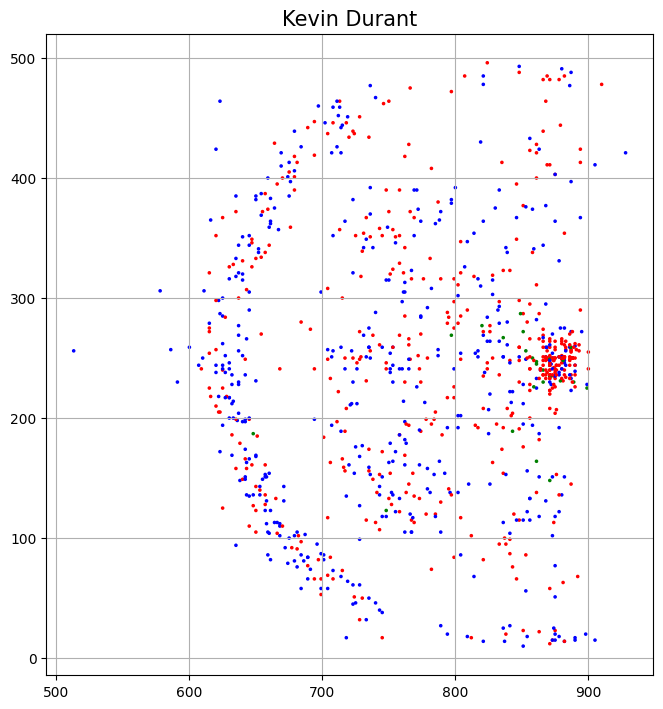

In [116]:
# Durant plot

hxD = Durant['halfcourt_x']
hyD = Durant['halfcourt_y']
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Kevin Durant", fontsize = 15)

Text(0.5, 1.0, 'Dwight Howard')

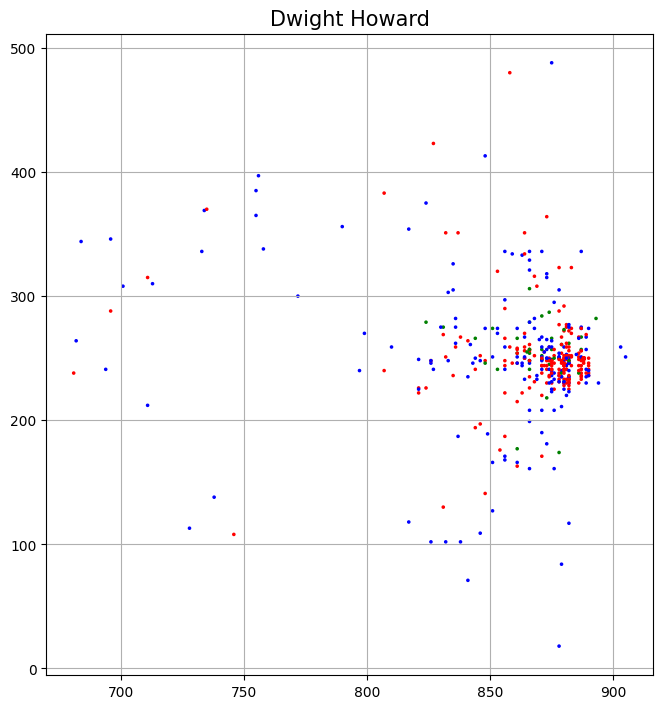

In [117]:
# Howard plot

hxH = Howard['halfcourt_x']
hyH = Howard['halfcourt_y']
colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxH,hyH, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Dwight Howard", fontsize = 15)

Text(0.5, 1.0, 'DeAndre Jordan')

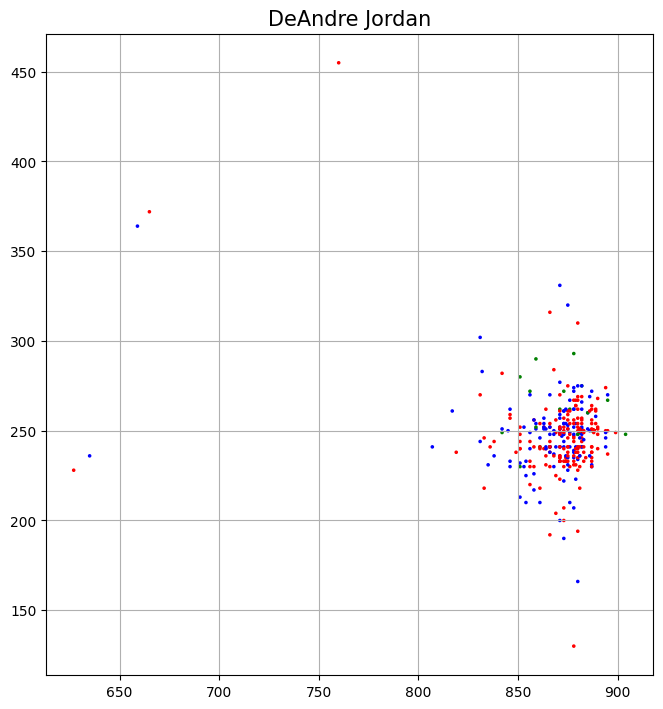

In [118]:
# Jordan plot

hxJ = Jordan['halfcourt_x']
hyJ = Jordan['halfcourt_y']
colors = np.where(Jordan['current_shot_outcome']=='SCORED','r',np.where(Jordan['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxJ,hyJ, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("DeAndre Jordan", fontsize = 15)

Text(0.5, 1.0, 'Russell Westbrook')

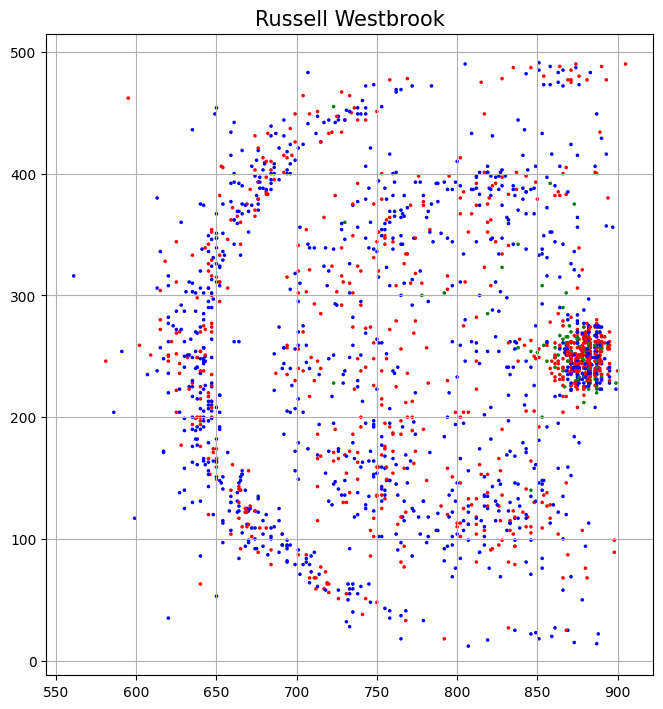

In [119]:
# Russell Westbrook plot

hxW = Westbrook['halfcourt_x']
hyW = Westbrook['halfcourt_y']
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
plt.figure(figsize=(94/12,50/6))
plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Russell Westbrook", fontsize = 15)

Text(0.5, 1.0, 'Kevin Durant')

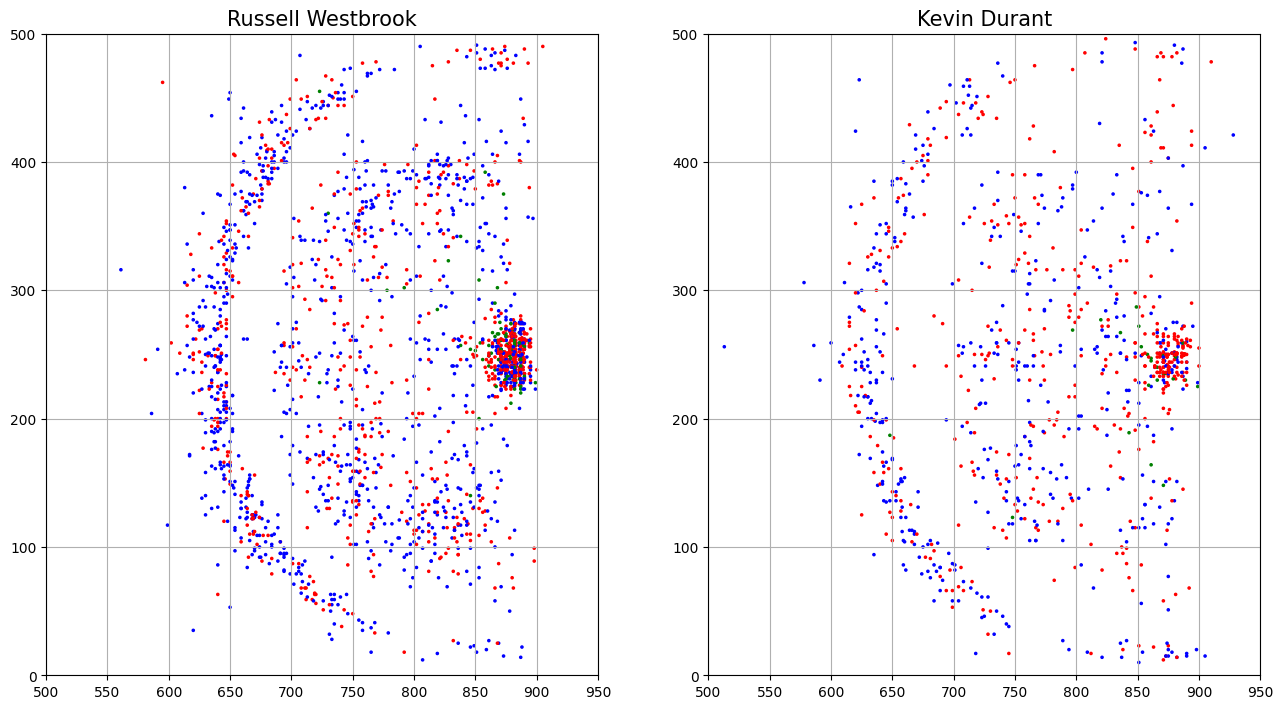

In [120]:
# Russell Westbrook and Kevin Durant side by side
f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Russell Westbrook", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Kevin Durant", fontsize = 15)

Text(0.5, 1.0, 'Dwight Howard')

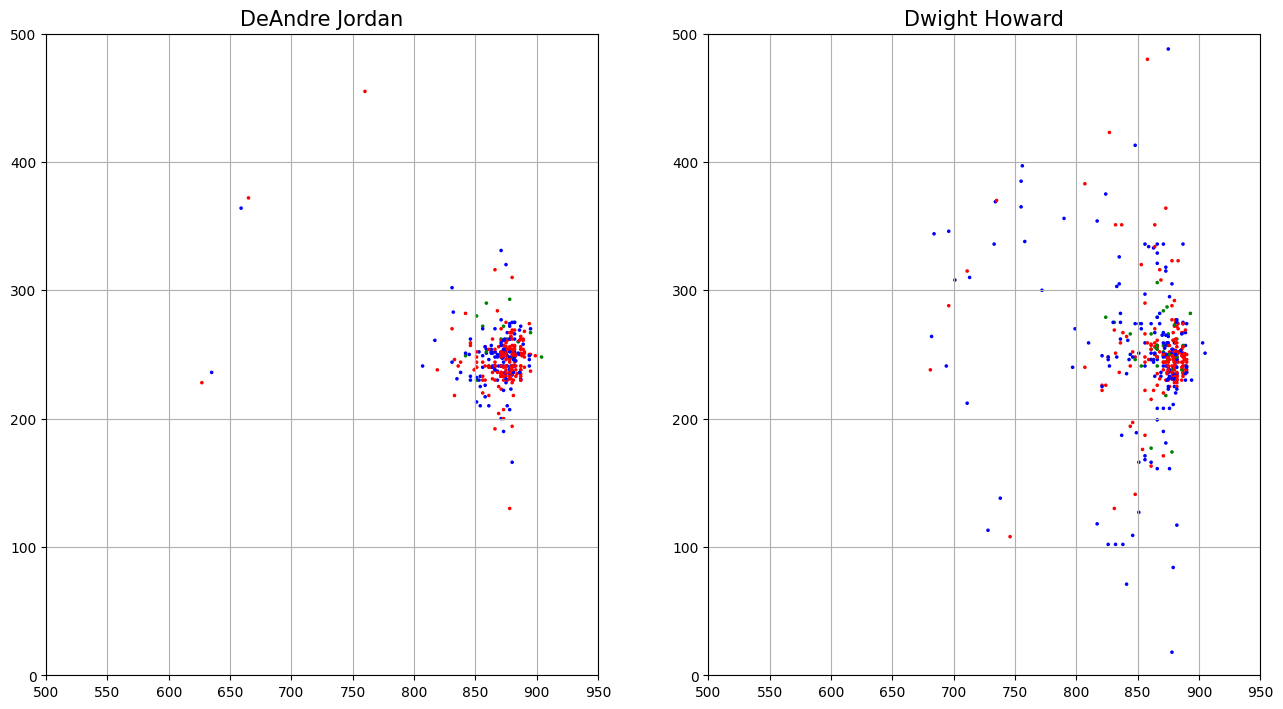

In [121]:
# DeAndre Jordan and Dwight Howard side by side

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Jordan['current_shot_outcome']=='SCORED','r',np.where(Jordan['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxJ,hyJ, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("DeAndre Jordan", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxH,hyH, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Dwight Howard", fontsize = 15)

Text(0.5, 1.0, 'Robin Lopez')

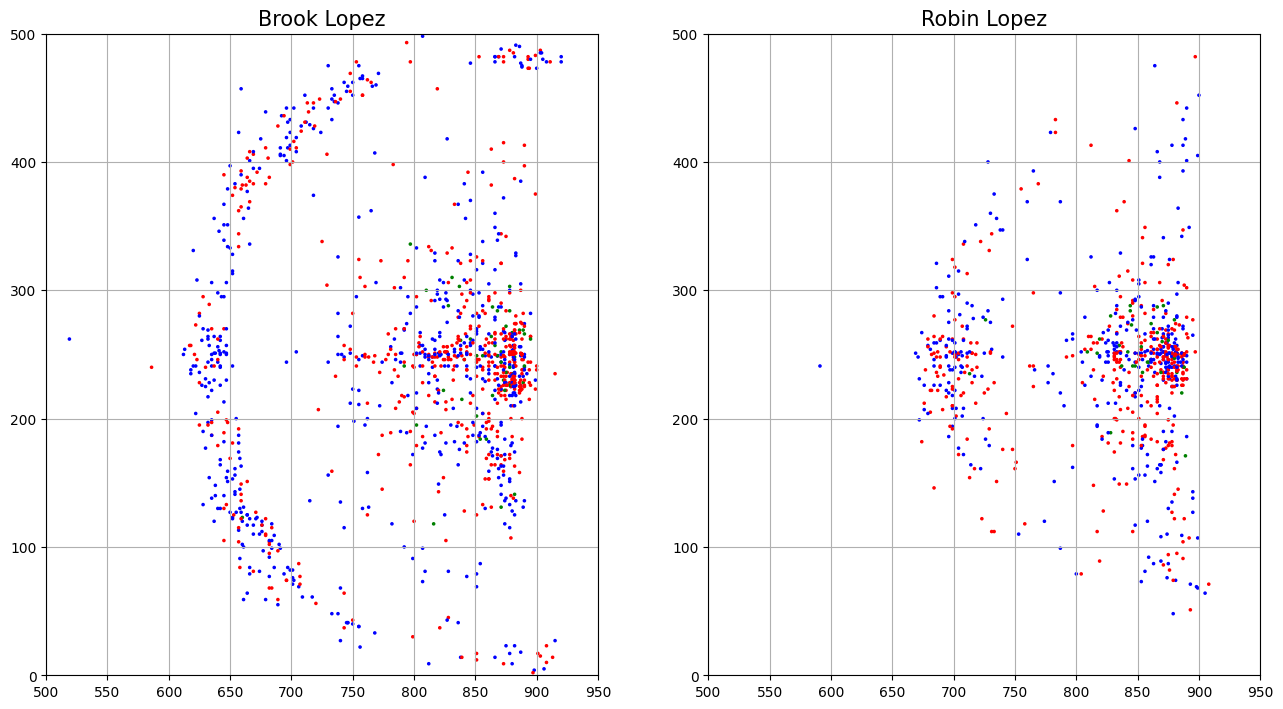

In [122]:
# Brook Lopez and Robin Lopez side by side

BrookL = shot[shot['shoot_player'] == 'Brook Lopez']
RobinL = shot[shot['shoot_player'] == 'Robin Lopez']

hxB = BrookL['halfcourt_x']
hyB = BrookL['halfcourt_y']

hxR = RobinL['halfcourt_x']
hyR = RobinL['halfcourt_y']

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(BrookL['current_shot_outcome']=='SCORED','r',np.where(BrookL['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxB,hyB, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Brook Lopez", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(RobinL['current_shot_outcome']=='SCORED','r',np.where(RobinL['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxR,hyR, s=10, c= colors, marker= '.')
plt.grid(True)
plt.xlim(500,950)
plt.ylim(0,500)
plt.title("Robin Lopez", fontsize = 15)

In [123]:
# II/7

NFL_Game = pd.read_csv(r'C:\Users\Dominik\Documents\PPKE ITK\1.semester\Data analytics in sport\W3.1\W3\nfl_game.csv')
display(NFL_Game)
NFL_Game.info()

,game_id,stadium,date,score,weather_temperature,weather_wind_mph,weather_humidity,score_diff,home,win,opponent_score,opponent,team_id,team_conference,team_conference_pre2002,stadium_location,stadium_capacity,stadium_open,stadium_close,stadium_type,stadium_age,conference,division,season,team_division,team_division_pre2002,team,stadium_neutral
0,1,Orange Bowl,9/2/1966,14,83,6,71,-9,1,0,23,Oakland Raiders,MIA,AFC,AFC,"Miami, FL",80045,1937,2008.0,outdoor,29,NFC,NFC West,1966,AFC East,AFC East,Miami Dolphins,0
1,1,Orange Bowl,9/2/1966,23,83,6,71,9,0,1,14,Miami Dolphins,OAK,AFC,AFC,"Miami, FL",80045,1937,2008.0,outdoor,29,AFC,AFC Central,1966,AFC West,AFC West,Oakland Raiders,0
2,2,Rice Stadium,9/3/1966,45,81,7,70,38,1,1,7,Denver Broncos,TEN,AFC,AFC,"Houston, TX",47000,1950,NaN,outdoor,16,NFC,NFC West,1966,NaN,AFC Central,Houston Oilers,0
3,2,Rice Stadium,9/3/1966,7,81,7,70,-38,0,0,45,Houston Oilers,DEN,AFC,AFC,"Houston, TX",47000,1950,NaN,outdoor,16,NFC,NFC West,1966,AFC West,AFC West,Denver Broncos,0
4,3,Balboa Stadium,9/4/1966,27,70,7,82,20,1,1,7,Buffalo Bills,LAC,AFC,AFC,"San Diego, CA",34000,1914,NaN,outdoor,52,NFC,NFC West,1966,AFC West,AFC West,San Diego Chargers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24309,12155,MetLife Stadium,12/29/2019,17,42,5,69,-17,1,0,34,Philadelphia Eagles,NYG,NFC,NFC,"East Rutherford, NJ",82500,2010,NaN,outdoor,9,NFC,NFC East,2019,NFC East,NFC East,New York Giants,0
24310,12156,CenturyLink Field,12/29/2019,26,51,3,70,5,0,1,21,Seattle Seahawks,SF,NFC,NFC,"Seattle, WA",67000,2002,NaN,outdoor,17,AFC,AFC West,2019,NFC West,NFC West,San Francisco 49ers,0
24311,12156,CenturyLink Field,12/29/2019,21,51,3,70,-5,1,0,26,San Francisco 49ers,SEA,NFC,AFC,"Seattle, WA",67000,2002,NaN,outdoor,17,AFC,AFC West,2019,NFC West,AFC West,Seattle Seahawks,0
24312,12157,Raymond James Stadium,12/29/2019,28,78,12,77,6,0,1,22,Tampa Bay Buccaneers,ATL,NFC,NFC,"Tampa, FL",65890,1998,2016.0,outdoor,21,NFC,AFC East,2019,NFC South,NFC West,Atlanta Falcons,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24314 entries, 0 to 24313
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   game_id                  24314 non-null  int64  
 1   stadium                  24314 non-null  object 
 2   date                     24314 non-null  object 
 3   score                    24314 non-null  int64  
 4   weather_temperature      24314 non-null  int64  
 5   weather_wind_mph         24314 non-null  int64  
 6   weather_humidity         24314 non-null  int64  
 7   score_diff               24314 non-null  int64  
 8   home                     24314 non-null  int64  
 9   win                      24314 non-null  int64  
 10  opponent_score           24314 non-null  int64  
 11  opponent                 24314 non-null  object 
 12  team_id                  24314 non-null  object 
 13  team_conference          24314 non-null  object 
 14  team_conference_pre200

In [124]:
# II/8

display(NFL_Game['date'].describe())
display(NFL_Game.groupby(['home'])['score'].describe())

# Q II/1 (plus the previous lines)
display(NFL_Game.shape)

NFL_Game['date']=pd.to_datetime(NFL_Game['date'])
display(NFL_Game['date'].describe())



count          24314
unique          2065
top       12/29/2019
freq              32
Name: date, dtype: object

,count,mean,std,min,25%,50%,75%,max
home,,,,,,,,
0,12157.0,19.643004,10.166614,0.0,13.0,20.0,27.0,62.0
1,12157.0,22.254997,10.533005,0.0,14.0,21.0,29.0,72.0


(24314, 28)

count                            24314
mean     1995-03-31 08:55:23.714732288
min                1966-09-02 00:00:00
25%                1981-11-29 00:00:00
50%                1995-12-24 00:00:00
75%                2008-09-21 00:00:00
max                2019-12-29 00:00:00
Name: date, dtype: object

In [125]:
# Task II/9

print("The corr. coef. between 'win' and 'home' is: ", NFL_Game['win'].corr(NFL_Game['home']))
print("The corr. coef. between 'score_diff' and 'home' is: ", NFL_Game['score_diff'].corr(NFL_Game['home']))
print("The corr. coef. between 'score' and 'weather_temperature' is: ", NFL_Game['score'].corr(NFL_Game['weather_temperature']))
print("The corr. coef. between 'score' and 'weather_humidity' is: ", NFL_Game['score'].corr(NFL_Game['weather_humidity']))
print("The corr. coef. between 'score' and 'weather_wind_mph' is: ", NFL_Game['score'].corr(NFL_Game['weather_wind_mph']))






The corr. coef. between 'win' and 'home' is:  0.14790211753177582
The corr. coef. between 'score_diff' and 'home' is:  0.1725059685987271
The corr. coef. between 'score' and 'weather_temperature' is:  0.033616900808932
The corr. coef. between 'score' and 'weather_humidity' is:  -0.03278832087607434
The corr. coef. between 'score' and 'weather_wind_mph' is:  -0.07895602955806053


In [126]:
# Task III/10 Reg1_1

reg1_1 = smf.ols(formula = 'score_diff ~ home', data= NFL_Game).fit()
print(reg1_1.summary())


                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     745.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          9.64e-162
Time:                        21:55:53   Log-Likelihood:            -1.0020e+05
No. Observations:               24314   AIC:                         2.004e+05
Df Residuals:                   24312   BIC:                         2.004e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6120      0.135    -19.309      0.0

In [127]:
# Task III/10 Reg1_2

reg1_2 = smf.ols(formula = 'score_diff ~ home + stadium_capacity + stadium_neutral + home * stadium_neutral', data= NFL_Game).fit()
print(reg1_2.summary())


                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     191.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          3.99e-162
Time:                        21:55:53   Log-Likelihood:            -1.0019e+05
No. Observations:               24314   AIC:                         2.004e+05
Df Residuals:                   24309   BIC:                         2.004e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.6386 

In [133]:
# Task III/10 Reg1_3

reg1_3 = smf.ols(formula = 'score_diff ~ home + stadium_capacity + stadium_neutral + home * stadium_neutral + team + opponent', data= NFL_Game).fit()
print(reg1_3.summary())


                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     20.23
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          7.02e-288
Time:                        23:32:26   Log-Likelihood:                -99748.
No. Observations:               24314   AIC:                         1.997e+05
Df Residuals:                   24229   BIC:                         2.004e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [129]:
# Task IV/10 Reg2_1

reg2_1 = smf.ols(formula = 'score ~ season + home', data= NFL_Game).fit()
print(reg2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     273.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          4.37e-118
Time:                        22:56:28   Log-Likelihood:                -91246.
No. Observations:               24314   AIC:                         1.825e+05
Df Residuals:                   24311   BIC:                         1.825e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -88.2969      8.615    -10.249      0.0

In [130]:
# Task IV/10 Reg2_2

reg2_2 = smf.ols(formula = 'score ~ season + home +weather_temperature + weather_wind_mph + weather_humidity', data= NFL_Game).fit()
print(reg2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.60e-136
Time:                        23:05:06   Log-Likelihood:                -91195.
No. Observations:               24314   AIC:                         1.824e+05
Df Residuals:                   24308   BIC:                         1.825e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -58.1972    

In [131]:
# Task IV/10 Reg2_3

reg2_3 = smf.ols(formula = 'score ~ season + home + weather_temperature + weather_wind_mph + weather_humidity + stadium_capacity + stadium_age + stadium_type + stadium_neutral + home * stadium_neutral', data= NFL_Game).fit()
print(reg2_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     60.80
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.09e-134
Time:                        23:09:11   Log-Likelihood:                -91186.
No. Observations:               24314   AIC:                         1.824e+05
Df Residuals:                   24302   BIC:                         1.825e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [132]:
# Task IV/10 Reg2_4

reg2_4 = smf.ols(formula = 'score ~ season + home + weather_temperature + weather_wind_mph + weather_humidity + stadium_capacity + stadium_age + stadium_type + stadium_neutral + home * stadium_neutral + team + opponent', data= NFL_Game).fit()
print(reg2_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     14.52
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          9.04e-211
Time:                        23:18:41   Log-Likelihood:                -90870.
No. Observations:               24314   AIC:                         1.819e+05
Df Residuals:                   24222   BIC:                         1.827e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep